# For a three star system sim each star needs:
mass - scalar value 
posistion - as a 3D vector (x, y, z) representing its location
velocity - a 3D vector (vx, vy, vz) to represent current speed and direction

# For calculating gravitational forces:
find the force magnitude of each pair of stars
F = G(m1*m2)/r^2 
each star experiences a net force that is the vector sum of the gravitational forces of the other two

# Updating motion (numarical integration)
approximate the motion over small time steps delta (t).
Acceleration - for each star a = Fnet / m
Velocity update - vnew = vcurrent + a * delta(t)
Position update - rnew = rcurrent + vnew * delta(t)
This is repeated for each step Google recommends Euler's method (simple but less accurate) or more advanced methods like the Runge-Kutta methods (more accurate but complex). Research both see what is your level(to myself).

# Simulation loop
Within the loop:
.Calculate all pairwise gravitational forces
.Calculate the net forces on each star
.Update the acceleration, velocity, and position of each star
.Visualize stars position at each step

# Visualization 
Google says: Libraries like Matplotlib or VPython can be used to visualize the stars' trajectories in 2D or 3D, making the simulation results understandable.

Proposition of three star system is polaris star system
(mass in solar masses)
m1 = 5.4 
m2 = 1.39
m3 = 1.26
Or Alpha Centauri (personal choice)
m1 = 1.1
m2 = 0.9 
m3 = 0.15

In [215]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML


In [216]:
G = 6.67430e-11 # m^3 kg^-1 s^-2/ This is the gravitational constant

dt = 60 * 60 * 24  # 1 day per step
steps = 2000

# masses (kg)
m1 = 2.188e30   # Alpha Cen A
m2 = 1.804e30   # Alpha Cen B
m3 = 1.1e29     # Proxima
masses = np.array([m1, m2, m3], dtype=float)

# positions (m)
r1 = np.array([ 0, 0, 0], float)   
r2 = np.array([23.4e12, 0, 0], float)  
r3 = np.array([0, 15e12, 0], float)    

# velocities (m/s)
v1 = np.array([0, 0, 0], float)  # will be adjusted slightly below
v2 = np.array([0, np.sqrt(G*m1/np.linalg.norm(r2-r1)), 0], float)
v3 = np.array([-np.sqrt(G*m1/np.linalg.norm(r3-r1)), 0, 0], float)

In [217]:
def gravitational_force(rA, rB, mA, mB):
    r = rB - rA
    d = np.linalg.norm(r)
    if d < 1e-10:
        return np.zeros(3)
    force_mag = G * mA * mB / d**2
    return force_mag * (r / d)

def accelerations(r1, r2, r3):
    F1 = gravitational_force(r1, r2, m1, m2) + gravitational_force(r1, r3, m1, m3)
    F2 = gravitational_force(r2, r1, m2, m1) + gravitational_force(r2, r3, m2, m3)
    F3 = gravitational_force(r3, r1, m3, m1) + gravitational_force(r3, r2, m3, m2)
    return F1 / m1, F2 / m2, F3 / m3

In [218]:
def rk4_step(r1, r2, r3, v1, v2, v3, dt, m1, m2, m3):
    # --- k1 ---
    a1, a2, a3 = accelerations(r1, r2, r3)  # still using global masses or pass if needed
    k1_r1, k1_r2, k1_r3 = v1, v2, v3
    k1_v1, k1_v2, k1_v3 = a1, a2, a3

    # --- k2 ---
    r1_2 = r1 + 0.5 * dt * k1_r1
    r2_2 = r2 + 0.5 * dt * k1_r2
    r3_2 = r3 + 0.5 * dt * k1_r3
    a1_2, a2_2, a3_2 = accelerations(r1_2, r2_2, r3_2)
    k2_r1, k2_r2, k2_r3 = v1 + 0.5 * dt * k1_v1, v2 + 0.5 * dt * k1_v2, v3 + 0.5 * dt * k1_v3
    k2_v1, k2_v2, k2_v3 = a1_2, a2_2, a3_2

    # --- k3 ---
    r1_3 = r1 + 0.5 * dt * k2_r1
    r2_3 = r2 + 0.5 * dt * k2_r2
    r3_3 = r3 + 0.5 * dt * k2_r3
    a1_3, a2_3, a3_3 = accelerations(r1_3, r2_3, r3_3)
    k3_r1, k3_r2, k3_r3 = v1 + 0.5 * dt * k2_v1, v2 + 0.5 * dt * k2_v2, v3 + 0.5 * dt * k2_v3
    k3_v1, k3_v2, k3_v3 = a1_3, a2_3, a3_3

    # --- k4 ---
    r1_4 = r1 + dt * k3_r1
    r2_4 = r2 + dt * k3_r2
    r3_4 = r3 + dt * k3_r3
    a1_4, a2_4, a3_4 = accelerations(r1_4, r2_4, r3_4)
    k4_r1, k4_r2, k4_r3 = v1 + dt * k3_v1, v2 + dt * k3_v2, v3 + dt * k3_v3
    k4_v1, k4_v2, k4_v3 = a1_4, a2_4, a3_4

    # --- Combine RK4 ---
    r1_new = r1 + dt/6 * (k1_r1 + 2*k2_r1 + 2*k3_r1 + k4_r1)
    r2_new = r2 + dt/6 * (k1_r2 + 2*k2_r2 + 2*k3_r2 + k4_r2)
    r3_new = r3 + dt/6 * (k1_r3 + 2*k2_r3 + 2*k3_r3 + k4_r3)
    v1_new = v1 + dt/6 * (k1_v1 + 2*k2_v1 + 2*k3_v1 + k4_v1)
    v2_new = v2 + dt/6 * (k1_v2 + 2*k2_v2 + 2*k3_v2 + k4_v2)
    v3_new = v3 + dt/6 * (k1_v3 + 2*k2_v3 + 2*k3_v3 + k4_v3)

    return r1_new, r2_new, r3_new, v1_new, v2_new, v3_new



In [219]:
# Simulation loop
pos1 = []
pos2 = []
pos3 = []

r1_temp, r2_temp, r3_temp = r1.copy(), r2.copy(), r3.copy()
v1_temp, v2_temp, v3_temp = v1.copy(), v2.copy(), v3.copy()

for _ in range(steps):
    r1_temp, r2_temp, r3_temp, v1_temp, v2_temp, v3_temp = rk4_step(
        r1_temp, r2_temp, r3_temp, v1_temp, v2_temp, v3_temp, dt, m1, m2, m3)
    pos1.append(r1_temp.copy())
    pos2.append(r2_temp.copy())
    pos3.append(r3_temp.copy())

pos1 = np.array(pos1)
pos2 = np.array(pos2)
pos3 = np.array(pos3)

In [ ]:
# Visualization 
scale = 1e10
pos1_plot = pos1 / scale
pos2_plot = pos2 / scale
pos3_plot = pos3 / scale

# Set up 3D figure
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

# Axis limits (make sure all stars fit)
ax.set_xlim(-50, 50)
ax.set_ylim(-50, 50)
ax.set_zlim(-50, 50)
ax.set_xlabel('X [1e12 m]')
ax.set_ylabel('Y [1e12 m]')
ax.set_zlabel('Z [1e12 m]')

# Initialize stars at first positions
star1, = ax.plot([pos1_plot[0,0]], [pos1_plot[0,1]], [pos1_plot[0,2]], 'ro', markersize=6)
star2, = ax.plot([pos2_plot[0,0]], [pos2_plot[0,1]], [pos2_plot[0,2]], 'bo', markersize=6)
star3, = ax.plot([pos3_plot[0,0]], [pos3_plot[0,1]], [pos3_plot[0,2]], 'go', markersize=6)

# Initialize trails (empty lines)
trail1, = ax.plot([], [], [], 'r-', linewidth=1)
trail2, = ax.plot([], [], [], 'b-', linewidth=1)
trail3, = ax.plot([], [], [], 'g-', linewidth=1)

def update(i):
    # Update star positions
    star1.set_data([pos1_plot[i,0]], [pos1_plot[i,1]])
    star1.set_3d_properties([pos1_plot[i,2]])
    
    star2.set_data([pos2_plot[i,0]], [pos2_plot[i,1]])
    star2.set_3d_properties([pos2_plot[i,2]])
    
    star3.set_data([pos3_plot[i,0]], [pos3_plot[i,1]])
    star3.set_3d_properties([pos3_plot[i,2]])

    # Update trails
    trail1.set_data(pos1_plot[:i+1,0], pos1_plot[:i+1,1])
    trail1.set_3d_properties(pos1_plot[:i+1,2])
    
    trail2.set_data(pos2_plot[:i+1,0], pos2_plot[:i+1,1])
    trail2.set_3d_properties(pos2_plot[:i+1,2])
    
    trail3.set_data(pos3_plot[:i+1,0], pos3_plot[:i+1,1])
    trail3.set_3d_properties(pos3_plot[:i+1,2])
    
    return star1, star2, star3, trail1, trail2, trail3

# Animate
ani = FuncAnimation(fig, update, frames=len(pos1_plot), interval=50, blit=False)
HTML(ani.to_jshtml())

print(pos1.shape, pos2.shape, pos3.shape)
print(pos1[:5])

[x1 y1 z1 vx1 vy1 vz1
 x2 y2 z2 vx2 vy2 vz2
 x3 y3 z3 vx3 vy3 vz3 ] this is the vector state for a three star system

def rk4_step(state, dt, masses):
    # unpack state
    pos = state[:3]
    vel = state[3:]

    def derivatives(pos, vel):
        acc = accelerations(pos, masses)
        return vel, acc

    # k1
    k1_v, k1_a = derivatives(pos, vel)

    # k2
    k2_pos = pos + 0.5 * dt * k1_v
    k2_vel = vel + 0.5 * dt * k1_a
    k2_v, k2_a = derivatives(k2_pos, k2_vel)

    # k3
    k3_pos = pos + 0.5 * dt * k2_v
    k3_vel = vel + 0.5 * dt * k2_a
    k3_v, k3_a = derivatives(k3_pos, k3_vel)

    # k4
    k4_pos = pos + dt * k3_v
    k4_vel = vel + dt * k3_a
    k4_v, k4_a = derivatives(k4_pos, k4_vel)

    # Combine
    new_pos = pos + (dt/6.0) * (k1_v + 2*k2_v + 2*k3_v + k4_v)
    new_vel = vel + (dt/6.0) * (k1_a + 2*k2_a + 2*k3_a + k4_a)

    new_state = np.concatenate((new_pos, new_vel))
    return new_state

In [96]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [97]:
G = 6.67430e-11 # m^3 kg^-1 s^-2/ This is the gravitational constant

dt = 60 * 60 * 24   # 1 day per step

# masses (kg)
m1 = 2.188e30   # Alpha Cen A
m2 = 1.804e30   # Alpha Cen B
m3 = 2.446e29   # Proxima
masses = np.array([m1, m2, m3], dtype=float)

AU = 1.495978707e11
mps_to_AU_per_day = (60*60*24) / AU

# positions
r1 = np.array([ 0.53, 0, 0], float)   
r2 = np.array([-0.53, 0, 0], float)  
r3 = np.array([13000, 0, 0], float) 


# compute real velocities (still in m/s)
rAB_meters = np.linalg.norm((r1 - r2) * AU)
rAP_meters = np.linalg.norm((r1 - r3) * AU)

vAB_mps = np.sqrt( G * (m1 + m2) / rAB_meters )
vProx_mps = np.sqrt( G * (m1 + m3) / rAP_meters )

# convert to AU/day
vAB = vAB_mps * mps_to_AU_per_day
vProx = vProx_mps * mps_to_AU_per_day

v1 = np.array([0,  vAB, 0], float)
v2 = np.array([0, -vAB, 0], float)
v3 = np.array([0,  vProx, 0], float)

In [98]:
def gravitational_force(rA, rB, mA, mB):
    r = rB - rA
    d = np.linalg.norm(r)
    if d == 0:
        return np.zeros(3)
    force_mag = G * mA * mB / d**2
    return force_mag * (r / d)

def accelerations(r1, r2, r3):
    F1 = gravitational_force(r1, r2, m1, m2) + gravitational_force(r1, r3, m1, m3)
    F2 = gravitational_force(r2, r1, m2, m1) + gravitational_force(r2, r3, m2, m3)
    F3 = gravitational_force(r3, r1, m3, m1) + gravitational_force(r3, r2, m3, m2)
    return F1 / m1, F2 / m2, F3 / m3

In [99]:
def rk4_step(r1, r2, r3, v1, v2, v3, dt):
    # k1
    a1_1, a2_1, a3_1 = accelerations(r1, r2, r3)
    k1_r1, k1_r2, k1_r3 = v1, v2, v3
    k1_v1, k1_v2, k1_v3 = a1_1, a2_1, a3_1

    r1_2 = r1 + 0.5 * dt * k1_r1
    r2_2 = r2 + 0.5 * dt * k1_r2
    r3_2 = r3 + 0.5 * dt * k1_r3
    v1_2 = v1 + 0.5 * dt * k1_v1
    v2_2 = v2 + 0.5 * dt * k1_v2
    v3_2 = v3 + 0.5 * dt * k1_v3

    # k2
    a1_2, a2_2, a3_2 = accelerations(r1_2, r2_2, r3_2)
    k2_r1, k2_r2, k2_r3 = v1_2, v2_2, v3_2
    k2_v1, k2_v2, k2_v3 = a1_2, a2_2, a3_2

    r1_3 = r1 + 0.5 * dt * k2_r1
    r2_3 = r2 + 0.5 * dt * k2_r2
    r3_3 = r3 + 0.5 * dt * k2_r3
    v1_3 = v1 + 0.5 * dt * k2_v1
    v2_3 = v2 + 0.5 * dt * k2_v2
    v3_3 = v3 + 0.5 * dt * k2_v3

# k3
    a1_3, a2_3, a3_3 = accelerations(r1_3, r2_3, r3_3)
    k3_r1, k3_r2, k3_r3 = v1_3, v2_3, v3_3
    k3_v1, k3_v2, k3_v3 = a1_3, a2_3, a3_3

    r1_4 = r1 + dt * k3_r1
    r2_4 = r2 + dt * k3_r2
    r3_4 = r3 + dt * k3_r3
    v1_4 = v1 + dt * k3_v1
    v2_4 = v2 + dt * k3_v2
    v3_4 = v3 + dt * k3_v3

    # k4
    a1_4, a2_4, a3_4 = accelerations(r1_4, r2_4, r3_4)
    k4_r1, k4_r2, k4_r3 = v1_4, v2_4, v3_4
    k4_v1, k4_v2, k4_v3 = a1_4, a2_4, a3_4

    # combine
    r1_new = r1 + (dt/6) * (k1_r1 + 2*k2_r1 + 2*k3_r1 + k4_r1)
    r2_new = r2 + (dt/6) * (k1_r2 + 2*k2_r2 + 2*k3_r2 + k4_r2)
    r3_new = r3 + (dt/6) * (k1_r3 + 2*k2_r3 + 2*k3_r3 + k4_r3)

    v1_new = v1 + (dt/6) * (k1_v1 + 2*k2_v1 + 2*k3_v1 + k4_v1)
    v2_new = v2 + (dt/6) * (k1_v2 + 2*k2_v2 + 2*k3_v2 + k4_v2)
    v3_new = v3 + (dt/6) * (k1_v3 + 2*k2_v3 + 2*k3_v3 + k4_v3)

    return r1_new, r2_new, r3_new, v1_new, v2_new, v3_new

Z-coordinate ranges:
Body 1 z-range: 0.0 to 0.0
Body 2 z-range: 0.0 to 0.0
Body 3 z-range: 0.0 to 0.0


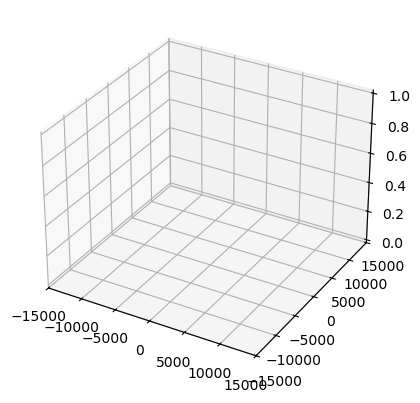

In [100]:
# Simulation loop
steps = 2000

pos1 = []
pos2 = []
pos3 = []

for _ in range(steps):
    r1, r2, r3, v1, v2, v3 = rk4_step(r1, r2, r3, v1, v2, v3, dt)
    pos1.append(r1.copy())
    pos2.append(r2.copy())
    pos3.append(r3.copy())

pos1 = np.array(pos1)
pos2 = np.array(pos2)
pos3 = np.array(pos3)

# Visualization 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

print("Z-coordinate ranges:")
print(f"Body 1 z-range: {np.min(pos1[:,2])} to {np.max(pos1[:,2])}")
print(f"Body 2 z-range: {np.min(pos2[:,2])} to {np.max(pos2[:,2])}")
print(f"Body 3 z-range: {np.min(pos3[:,2])} to {np.max(pos3[:,2])}")

ax.set_xlim(-50, 50)   # AU
ax.set_ylim(-50, 50)
ax.set_xlim(-15000, 15000)
ax.set_ylim(-15000, 15000)

star1, = ax.plot([], [], [], 'ro', markersize=6)
star2, = ax.plot([], [], [], 'bo', markersize=6)
star3, = ax.plot([], [], [], 'go', markersize=6)

def update(i):
    star1.set_data(pos1[i,0], pos1[i,1]); star1.set_3d_properties(pos1[i,2])
    star2.set_data(pos2[i,0], pos2[i,1]); star2.set_3d_properties(pos2[i,2])
    star3.set_data(pos3[i,0], pos3[i,1]); star3.set_3d_properties(pos3[i,2])
    return star1, star2, star3

ani = FuncAnimation(fig, update, frames=len(pos1), interval=1)
plt.show()